In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('zillow2.csv')
df.head()

,Unnamed: 0,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,...,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,NaN
1,1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,...,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,NaN
2,2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,...,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,NaN
3,3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,...,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central
4,4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,...,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52376 entries, 0 to 52375
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    52376 non-null  int64  
 1   parcelid                      52376 non-null  int64  
 2   propertylandusetypeid         52376 non-null  float64
 3   id                            52376 non-null  int64  
 4   bathroomcnt                   52376 non-null  float64
 5   bedroomcnt                    52376 non-null  float64
 6   calculatedbathnbr             52304 non-null  float64
 7   calculatedfinishedsquarefeet  52359 non-null  float64
 8   finishedsquarefeet12          52194 non-null  float64
 9   fips                          52376 non-null  float64
 10  fullbathcnt                   52304 non-null  float64
 11  latitude                      52376 non-null  float64
 12  longitude                     52376 non-null  float64
 13  l

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
pd.set_option('display.max_columns', None)

df.head()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc
0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,NaN,6.059063e+07,53571.0,1286.0,96978.0,0.0,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,NaN
1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,NaN,6.111001e+07,13091.0,2061.0,97099.0,5.0,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,NaN
2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,NaN,6.059022e+07,21412.0,1286.0,97078.0,6.0,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,NaN
3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central
4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,PSR2,6.037461e+07,47019.0,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central


In [6]:
def fix_fips(df):
    df['County'] = df.fips.map({6037:'Los Angeles County', 6059:'Orange County', 6111:'Ventura County'})
    return df

In [7]:
fix_fips(df)

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,County
0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,NaN,6.059063e+07,53571.0,1286.0,96978.0,0.0,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,NaN,Orange County
1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,NaN,6.111001e+07,13091.0,2061.0,97099.0,5.0,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,NaN,Ventura County
2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,NaN,6.059022e+07,21412.0,1286.0,97078.0,6.0,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,NaN,Orange County
3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central,Los Angeles County
4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,PSR2,6.037461e+07,47019.0,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central,Los Angeles County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52371,12412492,261.0,2274245,2.0,4.0,2.0,1633.0,1633.0,6037.0,2.0,33870815.0,-118070858.0,4630.0,0100,ATR16000*,6.037555e+07,30267.0,3101.0,96204.0,0.0,1.0,1962.0,125466.0,346534.0,2016.0,221068.0,4175.08,6.037555e+13,77607,0.001082,2017-09-19,Single Family Residential,Central,Los Angeles County
52372,11000655,261.0,673515,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,-118282383.0,47405.0,0100,LARE40,6.037101e+07,12447.0,3101.0,96284.0,0.0,1.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615,2017-09-20,Single Family Residential,Central,Los Angeles County
52373,17239384,261.0,2968375,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,-118706327.0,12105.0,1111,NaN,6.111008e+07,27110.0,2061.0,97116.0,7.0,NaN,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209,2017-09-21,Single Family Residential,NaN,Ventura County
52374,12773139,261.0,1843709,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,-118038169.0,5074.0,0100,SER1*,6.037434e+07,36502.0,3101.0,96480.0,0.0,1.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129,2017-09-21,Single Family Residential,Central,Los Angeles County


## Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

## Answer those questions through a mix of statistical tests and visualizations.

split the data and use train 

In [11]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  997220
validate observations:  427380
test observations:  356184


## question 1 to start it off - Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [12]:
train.shape, validate.shape, test.shape

((29330, 34), (12570, 34), (10476, 34))

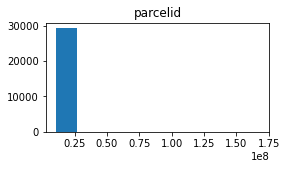

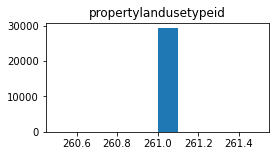

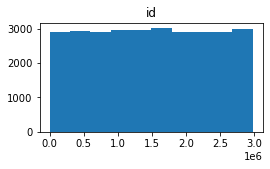

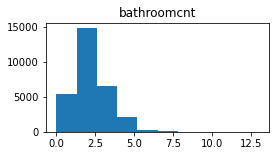

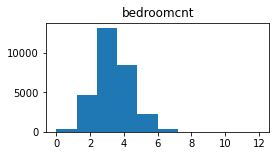

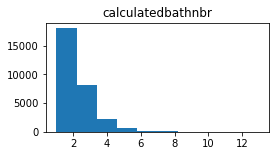

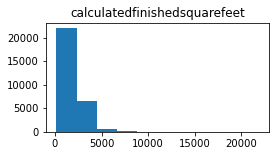

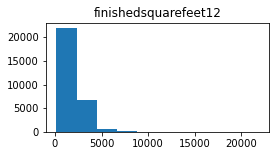

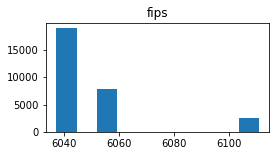

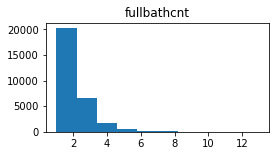

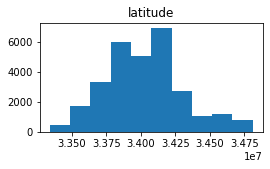

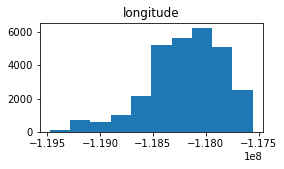

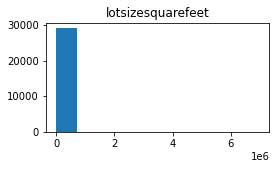

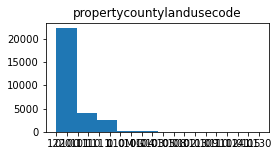

TypeError: '<=' not supported between instances of 'float' and 'str'

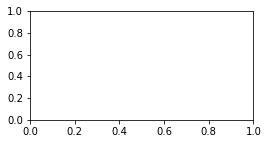

In [13]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [14]:
train.fips.value_counts()

6037.0    18970
6059.0     7888
6111.0     2472
Name: fips, dtype: int64

In [15]:
train.regionidzip.value_counts()

97319.0    446
97318.0    396
97329.0    319
97118.0    288
97328.0    287
          ... 
96148.0      1
97092.0      1
96002.0      1
96434.0      1
96467.0      1
Name: regionidzip, Length: 378, dtype: int64

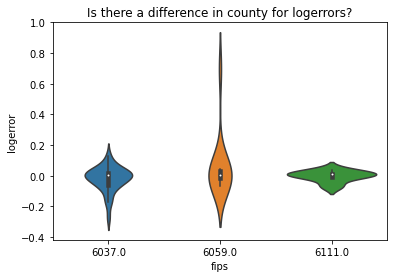

In [16]:

sample = train.sample(50)
sns.violinplot(sample.fips, sample.logerror)
plt.title("Is there a difference in county for logerrors?")
plt.show()

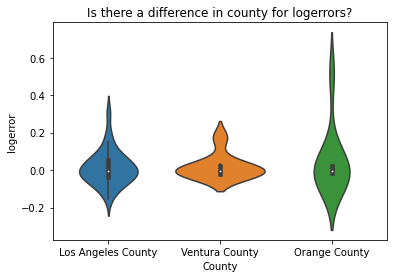

In [17]:
sample = train.sample(50)
sns.violinplot(sample.County, sample.logerror)
plt.title("Is there a difference in county for logerrors?")
plt.show()

i keep running the violin plots but there is no concreet pattern here 

 ## question 2 is there a relationship with the number of baths and log error 

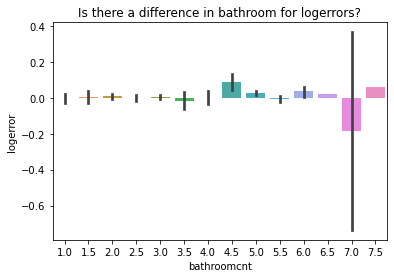

<Figure size 360x1440 with 0 Axes>

In [18]:
sample = train.sample(500)
sns.barplot(sample.bathroomcnt, sample.logerror)
plt.title("Is there a difference in bathroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

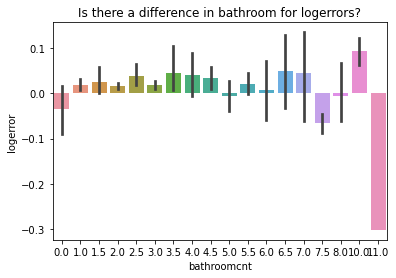

<Figure size 360x1440 with 0 Axes>

In [19]:
sample = train.sample(5000)
sns.barplot(sample.bathroomcnt, sample.logerror)
plt.title("Is there a difference in bathroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

takeaways- after running this a few times, there is a consistency with 8. bathroomcnt it alway was pretty high but idh vhave to run a stats test 

## Question 3 is there a relationship with the number of bedrromand log error 

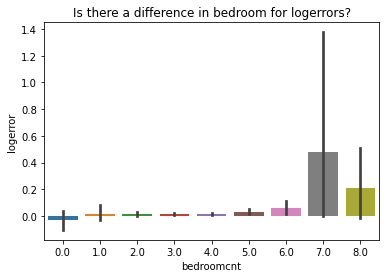

<Figure size 360x1440 with 0 Axes>

In [20]:
sample = train.sample(5000)
sns.barplot(sample.bedroomcnt, sample.logerror)
plt.title("Is there a difference in bedroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

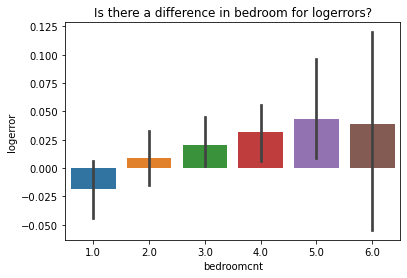

<Figure size 360x1440 with 0 Axes>

In [21]:
sample = train.sample(500)
sns.barplot(sample.bedroomcnt, sample.logerror)
plt.title("Is there a difference in bedroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

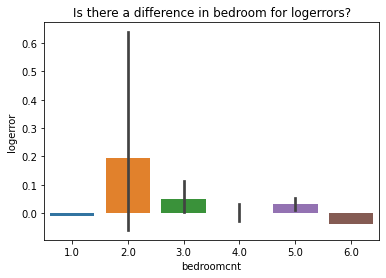

<Figure size 360x1440 with 0 Axes>

In [22]:
sample = train.sample(50)
sns.barplot(sample.bedroomcnt, sample.logerror)
plt.title("Is there a difference in bedroom for logerrors?")
plt.figure(figsize=(5,20))
plt.show()

## Question 4 what about log error and tax dollar count 

In [23]:
df.head()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,propertylandusedesc,heatingorsystemdesc,County
0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,NaN,6.059063e+07,53571.0,1286.0,96978.0,0.0,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595,2017-01-01,Single Family Residential,NaN,Orange County
1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,NaN,6.111001e+07,13091.0,2061.0,97099.0,5.0,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619,2017-01-01,Single Family Residential,NaN,Ventura County
2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,NaN,6.059022e+07,21412.0,1286.0,97078.0,6.0,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383,2017-01-01,Single Family Residential,NaN,Orange County
3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,LCR110000*,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410,2017-01-01,Single Family Residential,Central,Los Angeles County
4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,PSR2,6.037461e+07,47019.0,3101.0,96293.0,0.0,1.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011,2017-01-01,Single Family Residential,Central,Los Angeles County


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52376 entries, 0 to 52375
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52376 non-null  int64  
 1   propertylandusetypeid         52376 non-null  float64
 2   id                            52376 non-null  int64  
 3   bathroomcnt                   52376 non-null  float64
 4   bedroomcnt                    52376 non-null  float64
 5   calculatedbathnbr             52304 non-null  float64
 6   calculatedfinishedsquarefeet  52359 non-null  float64
 7   finishedsquarefeet12          52194 non-null  float64
 8   fips                          52376 non-null  float64
 9   fullbathcnt                   52304 non-null  float64
 10  latitude                      52376 non-null  float64
 11  longitude                     52376 non-null  float64
 12  lotsizesquarefeet             52016 non-null  float64
 13  p

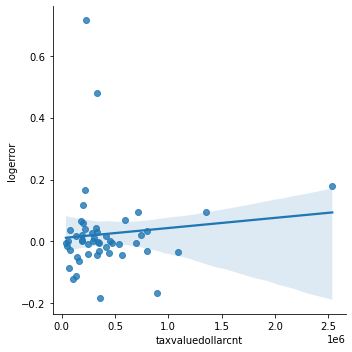

<Figure size 360x1440 with 0 Axes>

In [25]:
sample = train.sample(50)
sns.lmplot(x='taxvaluedollarcnt', y='logerror', data =sample)

plt.figure(figsize=(5,20))
plt.show()

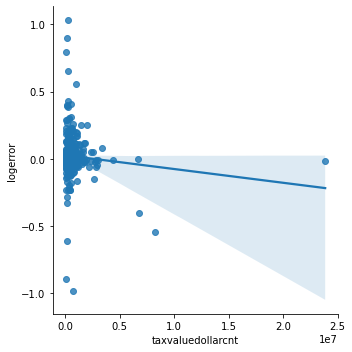

<Figure size 360x1440 with 0 Axes>

In [26]:
sample = train.sample(500)
sns.lmplot(x='taxvaluedollarcnt', y='logerror', data =sample)

plt.figure(figsize=(5,20))
plt.show()

looks like for the log error looks about the same for the 

## Question 5 - what about year built and logerror 

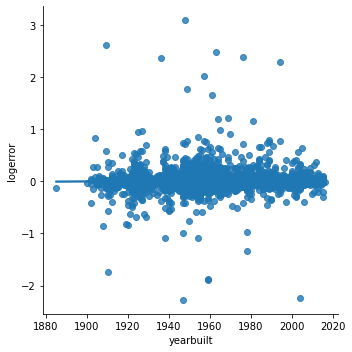

<Figure size 360x1440 with 0 Axes>

In [27]:
sample = train.sample(5000)
sns.lmplot(x='yearbuilt', y='logerror', data =sample)

plt.figure(figsize=(5,20))
plt.show()

 - looks like towards the middel there is some sort of large cluster but noting to crazy. 

More exploration 

In [28]:
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]
obj_cols

Index(['propertycountylandusecode', 'propertyzoningdesc', 'transactiondate',
       'propertylandusedesc', 'heatingorsystemdesc', 'County'],
      dtype='object')

In [29]:
for col in obj_cols:
    print(col.upper())
    print('Count:')
    print(df[col].value_counts())
    print('\n')
    print('Proportions:')
    print(df[col].value_counts(normalize=True, dropna=False))
    print('--------------------------')
    print('\n')

PROPERTYCOUNTYLANDUSECODE
Count:
0100    26773
122     13048
0101     6413
1111     3359
1        1046
1110     1022
0104      369
010G       94
0103       91
0108       57
010M       53
0109       18
0113        6
0110        6
0141        4
0102        3
0105        3
0111        2
1112        2
0130        2
0133        1
0131        1
0115        1
0114        1
010V        1
Name: propertycountylandusecode, dtype: int64


Proportions:
0100    0.511169
122     0.249122
0101    0.122442
1111    0.064132
1       0.019971
1110    0.019513
0104    0.007045
010G    0.001795
0103    0.001737
0108    0.001088
010M    0.001012
0109    0.000344
0113    0.000115
0110    0.000115
0141    0.000076
0102    0.000057
0105    0.000057
0111    0.000038
1112    0.000038
0130    0.000038
0133    0.000019
0131    0.000019
0115    0.000019
0114    0.000019
010V    0.000019
Name: propertycountylandusecode, dtype: float64
--------------------------


PROPERTYZONINGDESC
Count:
LAR1         6496
LARS      

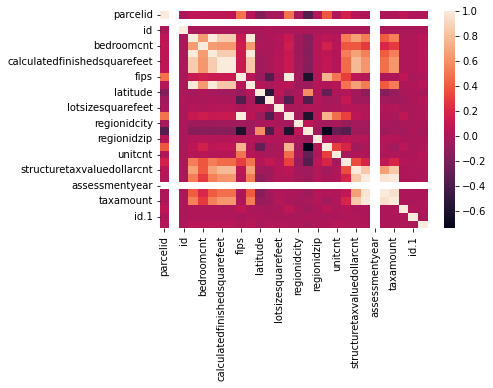

In [31]:
sns.heatmap(train.corr())
plt.show()

In [32]:
train.corr()

,parcelid,propertylandusetypeid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror
parcelid,1.000000,NaN,-0.000605,0.063257,0.074612,0.064045,0.064767,0.065482,0.484453,0.028332,-0.161284,-0.044771,-0.017746,0.484156,-0.026683,-0.360763,0.036693,0.387475,0.008082,0.167075,0.042886,0.017986,NaN,0.005237,0.006165,0.063084,0.000316,0.023828
propertylandusetypeid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id,-0.000605,NaN,1.000000,-0.004680,-0.009148,-0.004084,-0.002630,-0.002297,-0.007571,-0.003881,-0.007351,0.010468,-0.008017,-0.007575,0.003478,-0.000960,-0.009420,-0.005845,-0.004819,-0.002418,-0.001004,-0.003634,NaN,-0.004527,-0.005400,-0.005226,-0.001799,0.003606
bathroomcnt,0.063257,NaN,-0.004680,1.000000,0.647649,1.000000,0.851569,0.852091,0.113271,0.985833,-0.022055,0.002332,0.032439,0.113208,-0.050916,-0.149034,0.039965,0.073143,0.027363,0.529262,0.669910,0.530093,NaN,0.402262,0.532984,0.007862,0.015198,0.047589
bedroomcnt,0.074612,NaN,-0.009148,0.647649,1.000000,0.646231,0.626662,0.626915,0.137541,0.638795,0.016094,-0.005654,0.008934,0.138053,-0.051736,-0.139349,0.028997,0.166663,0.046887,0.384808,0.389789,0.281925,NaN,0.197806,0.284799,0.016066,0.010609,0.053558
calculatedbathnbr,0.064045,NaN,-0.004084,1.000000,0.646231,1.000000,0.853809,0.853799,0.115143,0.985833,-0.021910,0.001146,0.032730,0.115087,-0.051148,-0.149999,0.040039,0.072841,0.031688,0.529607,0.673160,0.532006,NaN,0.403519,0.534756,0.007989,0.014816,0.047367
calculatedfinishedsquarefeet,0.064767,NaN,-0.002630,0.851569,0.626662,0.853809,1.000000,1.000000,0.117607,0.833131,-0.042410,-0.005449,0.044502,0.117319,-0.047382,-0.143489,0.039793,0.082575,0.038145,0.457333,0.772829,0.618223,NaN,0.473241,0.619618,0.007139,0.010186,0.051365
finishedsquarefeet12,0.065482,NaN,-0.002297,0.852091,0.626915,0.853799,1.000000,1.000000,0.118711,0.833070,-0.044590,-0.004069,0.044370,0.118406,-0.047269,-0.147154,0.039965,0.084002,0.039358,0.456829,0.773987,0.619878,NaN,0.475253,0.621069,0.007212,0.009630,0.051554
fips,0.484453,NaN,-0.007571,0.113271,0.137541,0.115143,0.117607,0.118711,1.000000,0.053767,-0.073154,-0.364792,-0.007164,0.999937,-0.042160,-0.604089,0.038251,0.744691,0.492909,0.297101,0.064454,0.026498,NaN,0.005061,-0.000342,0.080977,-0.000794,0.009318
fullbathcnt,0.028332,NaN,-0.003881,0.985833,0.638795,0.985833,0.833131,0.833070,0.053767,1.000000,0.028909,-0.026446,0.034757,0.054052,-0.048367,-0.065429,0.036608,0.017930,0.030875,0.485731,0.659688,0.523000,NaN,0.397720,0.529180,0.003188,0.014852,0.044121
